![question](img/spring17q1.png)

In [1]:
import numpy as np
import pandas as pd
import pyquantlib as pq
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload

In [24]:
# question given:
t_list = np.array([5.0, 12.0, 18.0, 23.0, 27.0]) / 12.0
df_list = np.array([0.9933, 0.9787, 0.9595, 0.9430, 0.9365])
on_r = 0.02

#### Part i

In [25]:
r_list = pq.bonds.zeros_from_df(t_list, df_list)
r_list

array([ 0.01613411,  0.02153012,  0.02756198,  0.03062035,  0.02915811])

#### Part ii

In [26]:
# need to add the overnight rate to the lists
t_list_to_solve = np.append(0, t_list)
r_list_to_solve = np.append(on_r, r_list)
print(t_list_to_solve,"\n",r_list_to_solve)

[ 0.          0.41666667  1.          1.5         1.91666667  2.25      ] 
 [ 0.02        0.01613411  0.02153012  0.02756198  0.03062035  0.02915811]


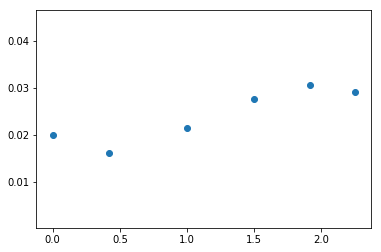

In [27]:
plt.scatter(t_list_to_solve, r_list_to_solve)
plt.show()

In [28]:
a, b, c, d, M, z = pq.interpolate.efficient_cub_spline(t_list_to_solve, r_list_to_solve)

In [29]:
M

array([[ 2.        ,  0.58333333,  0.        ,  0.        ],
       [ 0.58333333,  2.16666667,  0.5       ,  0.        ],
       [ 0.        ,  0.5       ,  1.83333333,  0.41666667],
       [ 0.        ,  0.        ,  0.41666667,  1.5       ]])

In [30]:
z

array([ 0.11117062,  0.01688048, -0.02834175, -0.0703607 ])

#### Part iii

In [34]:
solve_t_list = np.array([4.0, 10.0, 16.0, 22.0]) / 12.0
r_sol = {}
for t in solve_t_list:
    r = pq.interpolate.cubic_spline_func(t, t_list_to_solve, a, b, c, d)
    r_sol[t] = r
r_sol

{0.33333333333333331: 0.016427028153131008,
 0.83333333333333337: 0.019269968869165859,
 1.3333333333333333: 0.025685482261564797,
 1.8333333333333333: 0.030409545672842903}

### Checking Interpolation

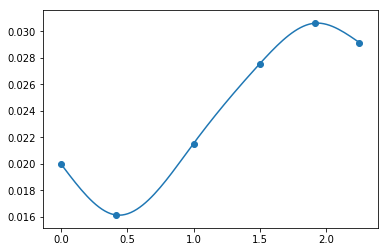

In [44]:
graph_t_list = np.linspace(0, 22, 1000)
graph_sol = []
for t in graph_t_list:
    r = pq.interpolate.cubic_spline_func(t, t_list_to_solve, a, b, c, d)
    graph_sol.append(r)

plt.plot(graph_t_list, graph_sol)
plt.scatter(t_list_to_solve, r_list_to_solve)

plt.show()

#### Part iv

In [46]:
# question given
mat_in_m = 22
cpn_rate = 0.07
freq = 2

In [49]:
t_list, cf_list, df = pq.bonds.gen_t_cf_dataframe(mat_in_m, cpn_rate, freq)
df

,cf
t,
0.333333,3.5
0.833333,3.5
1.333333,3.5
1.833333,103.5


In [54]:
r_list = np.array([])
for t in t_list:
    r = pq.interpolate.cubic_spline_func(t, t_list_to_solve, a, b, c, d)
    r_list = np.append(r_list, r)
r_list

array([ 0.01642703,  0.01926997,  0.02568548,  0.03040955])

In [56]:
df_list = pq.bonds.df_yld(t_list, r_list)
df_list

array([ 0.99453929,  0.98406994,  0.96633249,  0.94577476])

In [58]:
px = cf_list.dot(df_list)
px

108.19498385484783

### Checking the bond pricing:

In [60]:
r1 = pq.interpolate.cubic_spline_func(4/12, t_list_to_solve, a, b, c, d)
r2 = pq.interpolate.cubic_spline_func(10/12, t_list_to_solve, a, b, c, d)
r3 = pq.interpolate.cubic_spline_func(16/12, t_list_to_solve, a, b, c, d)
r4 = pq.interpolate.cubic_spline_func(22/12, t_list_to_solve, a, b, c, d)
print(r1, r2, r3, r4)

0.0164270281531 0.0192699688692 0.0256854822616 0.0304095456728


In [61]:
df1 = np.exp(-r1*4/12)
df2 = np.exp(-r2*10/12)
df3 = np.exp(-r3*16/12)
df4 = np.exp(-r4*22/12)
print(df1, df2, df3, df4)

0.994539288138 0.984069939832 0.966332491702 0.9457747617


In [66]:
df1 * 3.5 + df2 * 3.5 + df3 * 3.5 + df4 * 103.5

108.19498385484783